# Selenium 사용하기
* 웹페이지 테스트 자동화 도구
* https://selenium-python.readthedocs.io/

## selenium 설치
* anaconda selenium 설치
* `conda install -c conda-forge selenium`

In [1]:
!python3 -m pip install selenium

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.


## 크롬 드라이버 다운로드
* 크롬 브라우저 버전 확인
* 크롬 브라우저 버전에 맞게 Driver 파일 다운로드
* C:\Jupyterlab에 압축풀기

In [2]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time

driver_path = '/usr/local/bin/chromedriver'
driver = webdriver.Chrome(driver_path)

driver.get('http://www.python.org')
print(driver.title)
elem = driver.find_element_by_name("q")
elem.clear()
elem.send_keys("pycon")
time.sleep(3)
elem.send_keys(Keys.RETURN)
time.sleep(3)

print(driver.page_source)
driver.close()

Welcome to Python.org
<html class="js no-touch geolocation fontface generatedcontent svg formvalidation placeholder boxsizing no-retina" lang="en" dir="ltr" style=""><!--<![endif]--><head>
    <meta charset="utf-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">

    <link rel="prefetch" href="//ajax.googleapis.com/ajax/libs/jquery/1.8.2/jquery.min.js">
    <link rel="prefetch" href="//ajax.googleapis.com/ajax/libs/jqueryui/1.12.1/jquery-ui.min.js">

    <meta name="application-name" content="Python.org">
    <meta name="msapplication-tooltip" content="The official home of the Python Programming Language">
    <meta name="apple-mobile-web-app-title" content="Python.org">
    <meta name="apple-mobile-web-app-capable" content="yes">
    <meta name="apple-mobile-web-app-status-bar-style" content="black">

    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <meta name="HandheldFriendly" content="True">
    <meta name="format-detection" content="telepho

NAVER
<html lang="ko" data-useragent="mozilla/5.0 (macintosh; intel mac os x 10_15_7) applewebkit/537.36 (khtml, like gecko) chrome/92.0.4515.159 safari/537.36" data-platform="macintel"><head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta property="og:title" content="디미고 : 네이버 통합검색"> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="'디미고'의 네이버 통합검색 결과입니다."> <meta name="description" lang="ko" content="'디미고'의 네이버 통합검색 결과입니다."> <title>디미고 : 네이버 통합검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" title="Naver"><link rel=
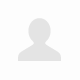
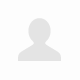
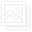
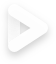
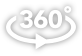
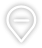
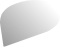
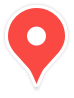
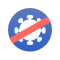
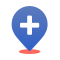
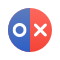
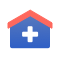

In [3]:
driver = webdriver.Chrome(driver_path)

driver.get('http://www.naver.com')
print(driver.title)
elem = driver.find_element_by_id("query")
elem.clear()
elem.send_keys("디미고")
time.sleep(3)
elem.send_keys(Keys.RETURN)
time.sleep(3)

print(driver.page_source)
driver.close()

In [8]:
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
driver = webdriver.Chrome(driver_path)

driver.get('http://www.starbucks.co.kr/store/store_map.do?disp=locale')
print(driver.title)

WebDriverWait(driver, 10).until(
  EC.presence_of_element_located((By.CSS_SELECTOR, ".set_sido_cd_btn"))
)

seoul = '#container > div > form > fieldset > div > section > article.find_store_cont > article > article:nth-child(4) > div.loca_step1 > div.loca_step1_cont > ul > li:nth-child(1) > a'
driver.find_element_by_css_selector(seoul).click()

all = '#mCSB_2_container > ul > li:nth-child(1) > a'
driver.find_element_by_css_selector(all).click()

time.sleep(3)
html = driver.page_source
driver.close()

Starbucks Coffee Korea


In [7]:
from bs4 import BeautifulSoup
import pandas as pd

In [26]:
soup = BeautifulSoup(html)
stores = soup.select('.quickResultLstCon')
lat = list(map(lambda x: x['data-lat'], stores))
long = list(map(lambda x: x['data-long'], stores))
name = list(map(lambda x: x['data-name'].strip(), stores))
address = list(map(lambda x: x.find('p').get_text().split('1522')[0], stores))
lat, long, name, address

(['37.501087',
  '37.510178',
  '37.514132',
  '37.499517',
  '37.494668',
  '37.515000',
  '37.5227934',
  '37.510150',
  '37.507750',
  '37.5273669',
  '37.488008',
  '37.485192',
  '37.505321',
  '37.511293',
  '37.502117',
  '37.50999',
  '37.518181',
  '37.492805',
  '37.497711',
  '37.498973',
  '37.522156',
  '37.526283',
  '37.521933',
  '37.525216',
  '37.492396',
  '37.52236449999999',
  '37.503331',
  '37.5075307',
  '37.5191632',
  '37.5162021',
  '37.492167',
  '37.514887',
  '37.5236351',
  '37.496801',
  '37.4941059',
  '37.513715',
  '37.5231593',
  '37.501623',
  '37.499721',
  '37.50314',
  '37.5243631',
  '37.5097863',
  '37.507794',
  '37.51464884',
  '37.49966175',
  '37.490298',
  '37.50703529',
  '37.50377562',
  '37.52674095',
  '37.52680046',
  '37.49592355',
  '37.50236693',
  '37.5165849',
  '37.493554',
  '37.47781106',
  '37.49971982',
  '37.49803646',
  '37.51075489999999',
  '37.51354184',
  '37.5018592',
  '37.52405601',
  '37.50393894',
  '37.515351',
 

In [30]:
store_list = list(map(lambda x: [x['data-name'].strip(), x['data-lat'], x['data-long'], x.find('p').get_text().split('1522')[0]], stores))
columns = ['매장명', '위도', '경도', '주소']
pd.DataFrame(data=store_list, columns=columns)

,매장명,위도,경도,주소
0,역삼아레나빌딩,37.501087,127.043069,서울특별시 강남구 언주로 425 (역삼동)
1,논현역사거리,37.510178,127.022223,서울특별시 강남구 강남대로 538 (논현동)
2,신사역성일빌딩,37.514132,127.020563,서울특별시 강남구 강남대로 584 (논현동)
3,국기원사거리,37.499517,127.031495,서울특별시 강남구 테헤란로 125 (역삼동)
4,스탈릿대치R,37.494668,127.062583,서울특별시 강남구 남부순환로 2947 (대치동)
...,...,...,...,...
558,사가정역,37.579594,127.087966,서울특별시 중랑구 면목로 310
559,상봉역,37.59689,127.08647,서울특별시 중랑구 망우로 307 (상봉동)
560,묵동이마트,37.613433,127.077484,"서울특별시 중랑구 동일로 932 (묵동, 묵동자이아파트) (묵동이마트 B1층)"
561,묵동,37.615368,127.076633,서울특별시 중랑구 동일로 952


In [27]:
df_data = {
  'name': name,
  'lat': lat,
  'long': long,
  'address': address,
}
df = pd.DataFrame(data=df_data)
df

,name,lat,long,address
0,역삼아레나빌딩,37.501087,127.043069,서울특별시 강남구 언주로 425 (역삼동)
1,논현역사거리,37.510178,127.022223,서울특별시 강남구 강남대로 538 (논현동)
2,신사역성일빌딩,37.514132,127.020563,서울특별시 강남구 강남대로 584 (논현동)
3,국기원사거리,37.499517,127.031495,서울특별시 강남구 테헤란로 125 (역삼동)
4,스탈릿대치R,37.494668,127.062583,서울특별시 강남구 남부순환로 2947 (대치동)
...,...,...,...,...
558,사가정역,37.579594,127.087966,서울특별시 중랑구 면목로 310
559,상봉역,37.59689,127.08647,서울특별시 중랑구 망우로 307 (상봉동)
560,묵동이마트,37.613433,127.077484,"서울특별시 중랑구 동일로 932 (묵동, 묵동자이아파트) (묵동이마트 B1층)"
561,묵동,37.615368,127.076633,서울특별시 중랑구 동일로 952


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563 entries, 0 to 562
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   name     563 non-null    object
 1   lat      563 non-null    object
 2   long     563 non-null    object
 3   address  563 non-null    object
dtypes: object(4)
memory usage: 17.7+ KB


In [29]:
df['lat'] = df['lat'].astype(float)
df['long'] = df['long'].astype(float)
df

,name,lat,long,address
0,역삼아레나빌딩,37.501087,127.043069,서울특별시 강남구 언주로 425 (역삼동)
1,논현역사거리,37.510178,127.022223,서울특별시 강남구 강남대로 538 (논현동)
2,신사역성일빌딩,37.514132,127.020563,서울특별시 강남구 강남대로 584 (논현동)
3,국기원사거리,37.499517,127.031495,서울특별시 강남구 테헤란로 125 (역삼동)
4,스탈릿대치R,37.494668,127.062583,서울특별시 강남구 남부순환로 2947 (대치동)
...,...,...,...,...
558,사가정역,37.579594,127.087966,서울특별시 중랑구 면목로 310
559,상봉역,37.596890,127.086470,서울특별시 중랑구 망우로 307 (상봉동)
560,묵동이마트,37.613433,127.077484,"서울특별시 중랑구 동일로 932 (묵동, 묵동자이아파트) (묵동이마트 B1층)"
561,묵동,37.615368,127.076633,서울특별시 중랑구 동일로 952
